In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import torch
from daphne import daphne
from evaluation_based_sampling import likelihood_weighting
from mh_gibbs import MH_Gibbs
from hmc import HMC

In [2]:
def load_ast(num):
    return daphne(['desugar', '-i', '../a3/programs/{}.daphne'.format(num)])

def load_graph(num):
    return daphne(['graph', '-i', '../a3/programs/{}.daphne'.format(num)])

# Program 1

## IS

In [45]:
ast = load_ast(1)
num_samples = int(1e6)

start = time.time()
samples, log_weights = likelihood_weighting(ast, num_samples=num_samples)
end = time.time()

samples = np.array(samples)
weights = np.exp(np.array(log_weights))
mean = np.average(samples, weights=weights)
variance = np.average(np.square(samples - mean), weights=weights)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of mu: {:.3f}".format(mean))
print("Posterior variance of mu: {:.3f}".format(variance))

Number of samples: 1000000
Sampling time: 94 seconds
Posterior mean of mu: 7.270
Posterior variance of mu: 0.846


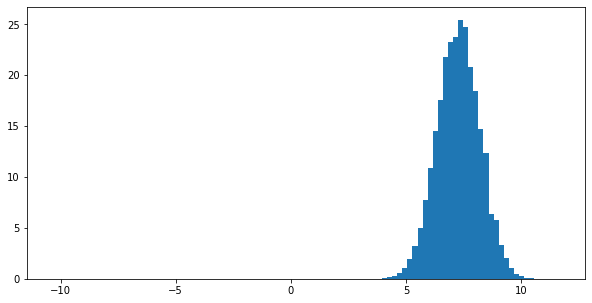

In [53]:
plt.figure(figsize=(10,5))
plt.hist(samples, weights=weights, bins=100)
plt.savefig("figs/p1_IS_hist.png")

## MH Gibbs

In [15]:
num_samples = int(5e5)
graph = load_graph(1)
gibbs = MH_Gibbs(graph)

start = time.time()
samples, log_density = gibbs.sample(num_samples=num_samples)
end = time.time()

samples = np.array(samples)
log_density = np.array(log_density)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of mu: {:.3f}".format(np.mean(samples)))
print("Posterior variance of mu: {:.3f}".format(np.var(samples)))

Number of samples: 500000
Sampling time: 228 seconds
Poterior mean of mu: 7.255
Posterior variance of mu: 0.819


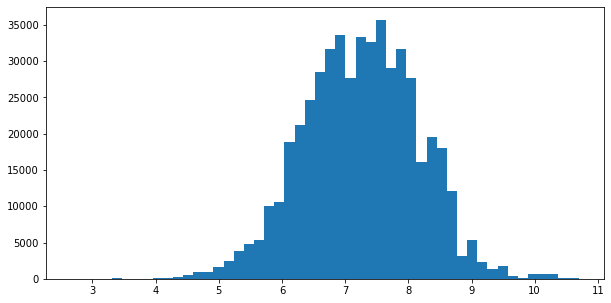

In [16]:
plt.figure(figsize=(10,5))
plt.hist(samples, bins=50)
plt.savefig("figs/p1_gibbs_hist.png")

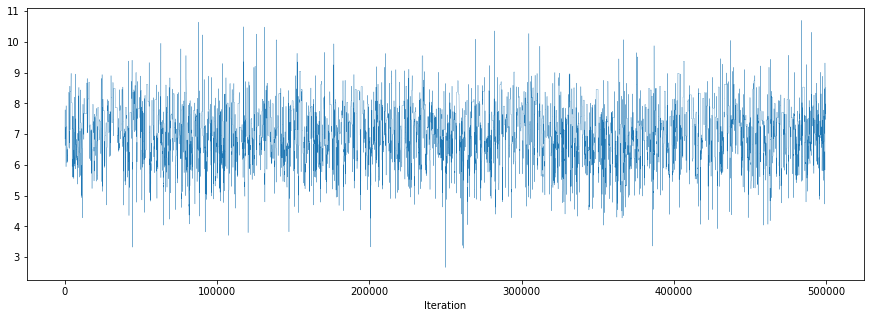

In [17]:
plt.figure(figsize=(15,5))
plt.plot(samples, linewidth=0.3)
plt.xlabel("Iteration")
plt.savefig("figs/p1_gibbs_trace.png")

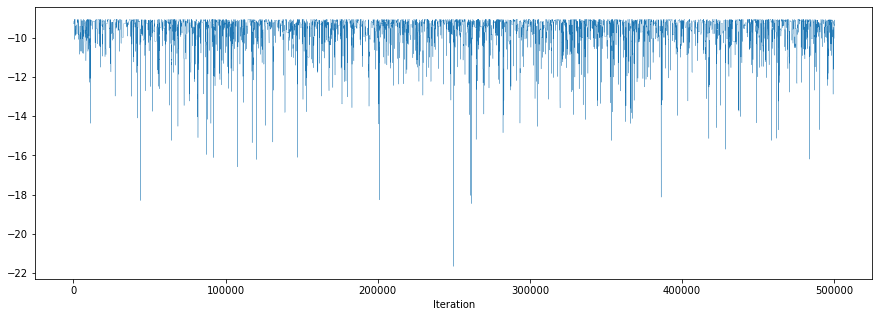

In [18]:
plt.figure(figsize=(15,5))
plt.plot(log_density, linewidth=0.3)
plt.xlabel("Iteration")
plt.savefig("figs/p1_gibbs_density.png")

## HMC

In [19]:
num_samples = int(1e5)
hmc = HMC(load_graph(1))
T = 10
epsilon = 0.1
M = torch.eye(len(hmc.X))

start = time.time()
samples, log_density = hmc.sample(num_samples, T, epsilon, M)
end = time.time()

samples = np.array(samples)
log_density = np.array(log_density)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of mu: {:.3f}".format(np.mean(samples)))
print("Posterior variance of mu: {:.3f}".format(np.var(samples)))

Number of samples: 100000
Sampling time: 273 seconds
Poterior mean of mu: 7.247
Posterior variance of mu: 0.832


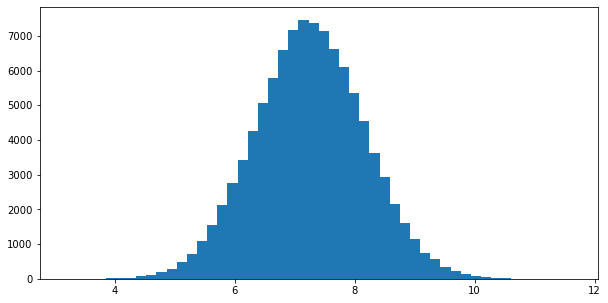

In [20]:
plt.figure(figsize=(10,5))
plt.hist(samples, bins=50)
plt.savefig("figs/p1_hmc_hist.png")

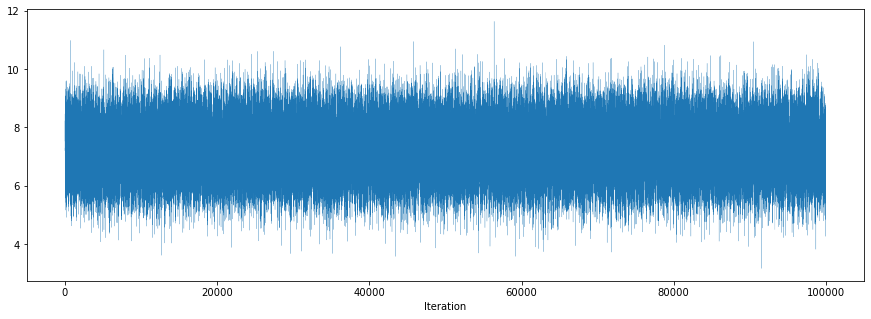

In [27]:
plt.figure(figsize=(15,5))
plt.plot(samples, linewidth=0.2)
plt.xlabel("Iteration")
plt.savefig("figs/p1_hmc_trace.png")

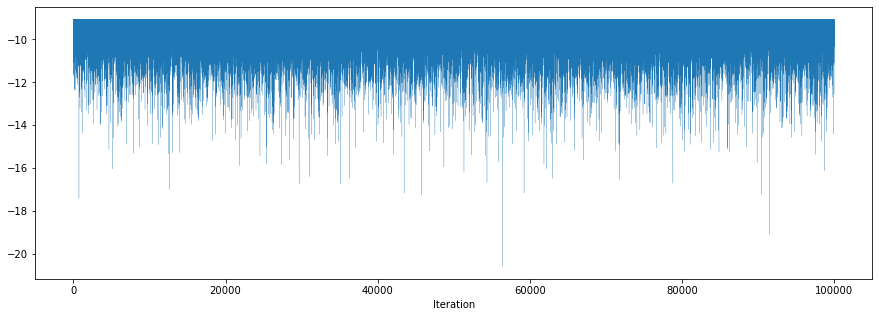

In [28]:
plt.figure(figsize=(15,5))
plt.plot(log_density, linewidth=0.2)
plt.xlabel("Iteration")
plt.savefig("figs/p1_hmc_density.png")

# Program 2

## IS

In [31]:
num_samples = int(1e6)
ast = load_ast(2)

start = time.time()
samples, log_weights = likelihood_weighting(ast, num_samples=num_samples)
end = time.time()

samples = np.array([sample.numpy() for sample in samples])
weights = np.exp(np.array(log_weights))
slope_mean = np.average(samples[:, 0], weights=weights)
slope_var = np.average(np.square(samples[:, 0] - slope_mean), weights=weights)
bias_mean = np.average(samples[:, 1], weights=weights)
bias_var = np.average(np.square(samples[:, 1] - bias_mean), weights=weights)
cov_slope_bias = np.average((samples[:, 0] - slope_mean) * (samples[:, 1] - bias_mean), weights=weights)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of slope: {:.3f}".format(slope_mean))
print("Posterior mean of bias: {:.3f}".format(bias_mean))
print("Covariance matrix:\n", np.array([[slope_var, cov_slope_bias], [cov_slope_bias, bias_var]]))

Number of samples: 1000000
Sampling time: 404 seconds
Posterior mean of slope: 2.149
Posterior mean of bias: -0.511
Covariance matrix:
 [[ 0.05794547 -0.20068659]
 [-0.20068659  0.8626565 ]]


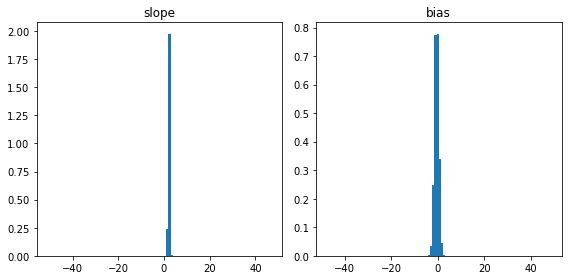

In [43]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(samples[:, 0], weights=weights, bins=100)
plt.title("slope")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], weights=weights, bins=100)
plt.title("bias")
plt.tight_layout()
plt.savefig("figs/p2_IS_hist.png")

## MH Gibbs

In [3]:
num_samples = int(3e5)
gibbs = MH_Gibbs(load_graph(2))

start = time.time()
samples, log_density = gibbs.sample(num_samples=num_samples)
end = time.time()

samples = np.array([sample.numpy() for sample in samples])
log_density = np.array(log_density)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of slope: {:.3f}".format(np.mean(samples[:, 0])))
print("Posterior mean of bias: {:.3f}".format(np.mean(samples[:, 1])))
print("Covariance matrix:\n", np.cov(samples.T))

Number of samples: 300000
Sampling time: 481 seconds
Posterior mean of slope: 2.149
Posterior mean of bias: -0.505
Covariance matrix:
 [[ 0.05719998 -0.20169508]
 [-0.20169508  0.872268  ]]


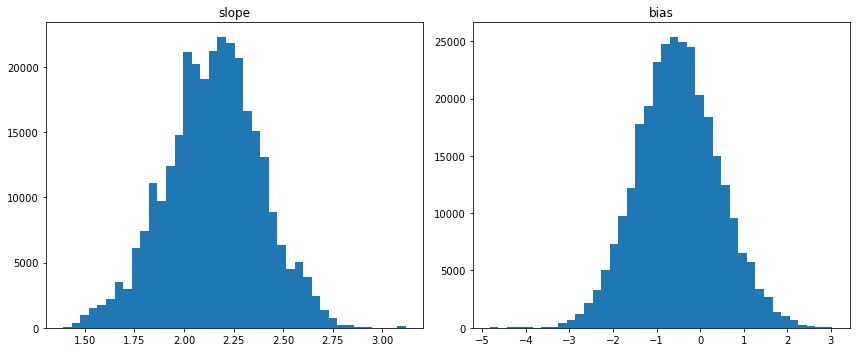

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(samples[:, 0], bins=40)
plt.title("slope")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], bins=40)
plt.title("bias")
plt.tight_layout()
plt.savefig("figs/p2_gibbs_hist.png")

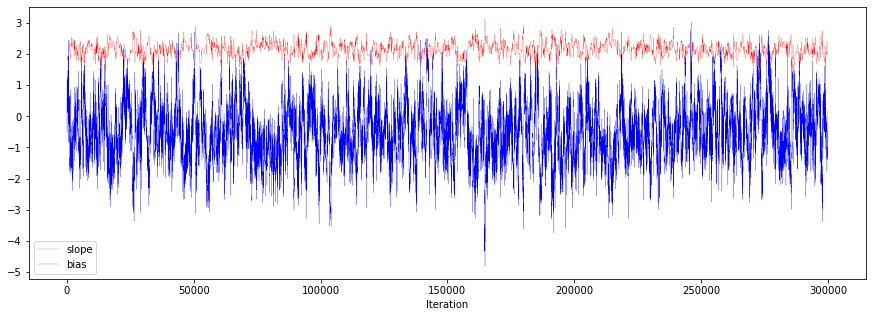

In [5]:
plt.figure(figsize=(15,5))
plt.plot(samples[:, 0], linewidth=0.2, color="red", label="slope")
plt.plot(samples[:, 1], linewidth=0.2, color="blue", label="bias")
plt.legend(loc="lower left")
plt.xlabel("Iteration")
plt.savefig("figs/p2_gibbs_trace.png")

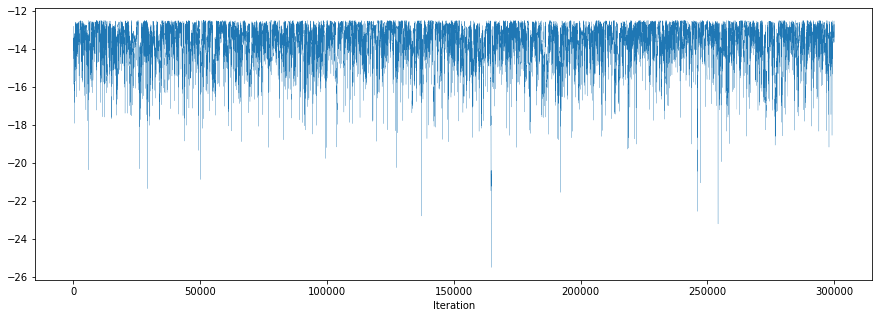

In [6]:
plt.figure(figsize=(15,5))
plt.plot(log_density, linewidth=0.2)
plt.xlabel("Iteration")
plt.savefig("figs/p2_gibbs_density.png")

## HMC

In [3]:
num_samples = int(7e4)
hmc = HMC(load_graph(2))
T = 10
epsilon = 0.05
M = torch.eye(len(hmc.X))

start = time.time()
samples, log_density = hmc.sample(num_samples, T, epsilon, M)
end = time.time()

samples = np.array([sample.numpy() for sample in samples])
log_density = np.array(log_density)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of slope: {:.3f}".format(np.mean(samples[:, 0])))
print("Posterior mean of bias: {:.3f}".format(np.mean(samples[:, 1])))
print("Covariance matrix:\n", np.cov(samples.T))

Number of samples: 70000
Sampling time: 516 seconds
Posterior mean of slope: 2.149
Posterior mean of bias: -0.504
Covariance matrix:
 [[ 0.05589852 -0.19442278]
 [-0.19442278  0.8419477 ]]


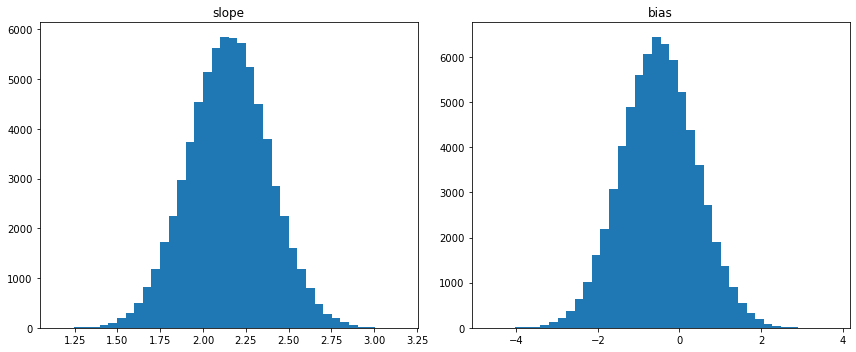

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(samples[:, 0], bins=40)
plt.title("slope")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], bins=40)
plt.title("bias")
plt.tight_layout()
plt.savefig("figs/p2_hmc_hist.png")

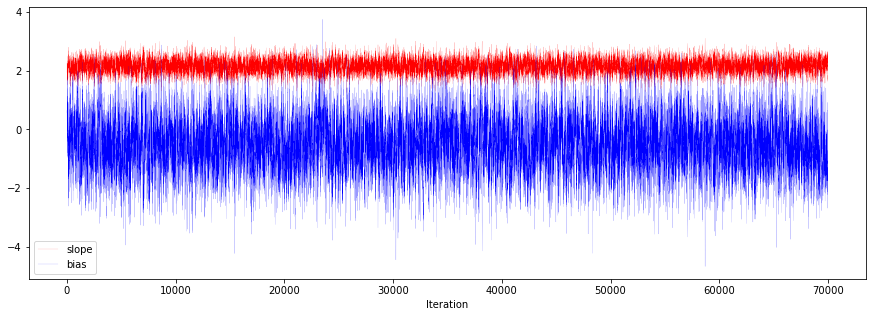

In [7]:
plt.figure(figsize=(15,5))
plt.plot(samples[:, 0], linewidth=0.1, color="red", label="slope")
plt.plot(samples[:, 1], linewidth=0.1, color="blue", label="bias")
plt.legend(loc="lower left")
plt.xlabel("Iteration")
plt.savefig("figs/p2_hmc_trace.png")

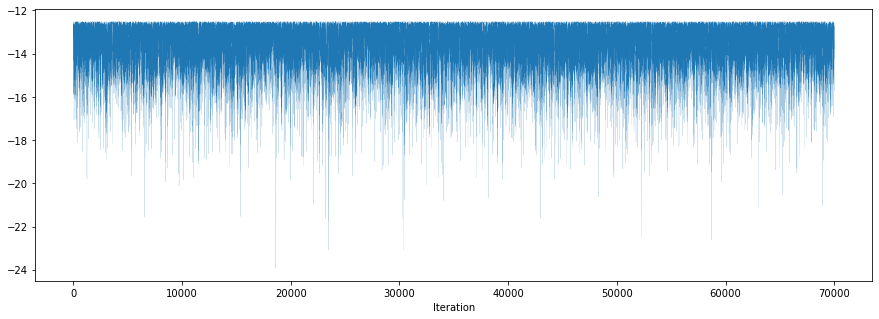

In [10]:
plt.figure(figsize=(15,5))
plt.plot(log_density, linewidth=0.1)
plt.xlabel("Iteration")
plt.savefig("figs/p2_hmc_density.png")

# Program 3

## IS

In [11]:
ast = load_ast(3)
num_samples = int(5e5)

start = time.time()
samples, log_weights = likelihood_weighting(ast, num_samples=num_samples)
end = time.time()

samples = np.array(samples, dtype=float)
weights = np.exp(np.array(log_weights))

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("P(z[1] == z[2] | data) = {:.3f}".format(np.average(samples, weights=weights)))

Number of samples: 500000
Sampling time: 268 seconds
P(z[1] == z[2] | data) = 0.702


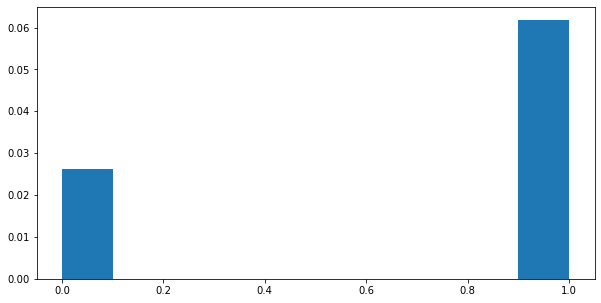

In [12]:
plt.figure(figsize=(10,5))
plt.hist(samples, weights=weights)
plt.savefig("figs/p3_IS_hist.png")

## MH Gibbs

In [3]:
num_samples = int(4e4)
gibbs = MH_Gibbs(load_graph(3))

start = time.time()
samples, log_density = gibbs.sample(num_samples=num_samples)
end = time.time()

samples = np.array(samples, dtype=float)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("P(z[1] == z[2] | data) = {:.3f}".format(np.mean(samples)))

Number of samples: 40000
Sampling time: 572 seconds
P(z[1] == z[2] | data) = 0.646


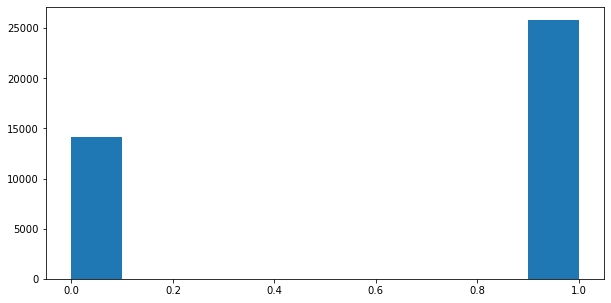

In [5]:
plt.figure(figsize=(10,5))
plt.hist(samples)
plt.savefig("figs/p3_gibbs_hist.png")

# Program 4

## IS

In [13]:
ast = load_ast(4)
num_samples = int(1e6)

start = time.time()
samples, log_weights = likelihood_weighting(ast, num_samples=num_samples)
end = time.time()

samples = np.array(samples)
weights = np.exp(np.array(log_weights))

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("P(is-raining | sprinkler, wet-grass) = {:.3f}".format(np.average(samples, weights=weights)))

Number of samples: 1000000
Sampling time: 166 seconds
P(is-raining | sprinkler, wet-grass) = 0.320


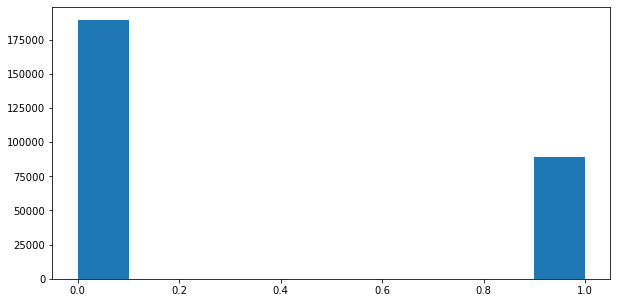

In [14]:
plt.figure(figsize=(10,5))
plt.hist(samples, weights=weights)
plt.savefig("figs/p4_IS_hist.png")

## MH Gibbs

In [3]:
num_samples = int(3e5)
gibbs = MH_Gibbs(load_graph(4))

start = time.time()
samples, log_density = gibbs.sample(num_samples=num_samples)
end = time.time()

samples = np.array(samples)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("P(is-raining | sprinkler, wet-grass) = {:.3f}".format(np.mean(samples)))

Number of samples: 300000
Sampling time: 522 seconds
P(is-raining | sprinkler, wet-grass) = 0.319


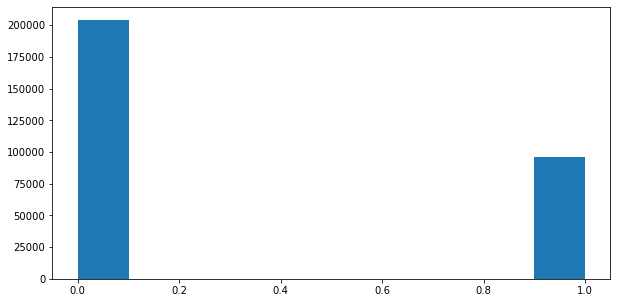

In [4]:
plt.figure(figsize=(10,5))
plt.hist(samples)
plt.savefig("figs/p4_gibbs_hist.png")

# Program 5

## IS

In [5]:
ast = load_ast(5)
num_samples = int(6e6)

start = time.time()
samples, log_weights = likelihood_weighting(ast, num_samples=num_samples)
end = time.time()

samples = np.array([sample.numpy() for sample in samples])
weights = np.exp(np.array(log_weights))
x_mean = np.average(samples[:, 0], weights=weights)
x_var = np.average(np.square(samples[:, 0] - x_mean), weights=weights)
y_mean = np.average(samples[:, 1], weights=weights)
y_var = np.average(np.square(samples[:, 1] - y_mean), weights=weights)


print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean and variance of x: {:.3f} and {:.3f}".format(x_mean, x_var))
print("Posterior mean and variance of y: {:.3f} and {:.3f}".format(y_mean, y_var))

Number of samples: 6000000
Sampling time: 524 seconds
Posterior mean and variance of x: 3.539 and 49.325
Posterior mean and variance of y: 3.460 and 49.326


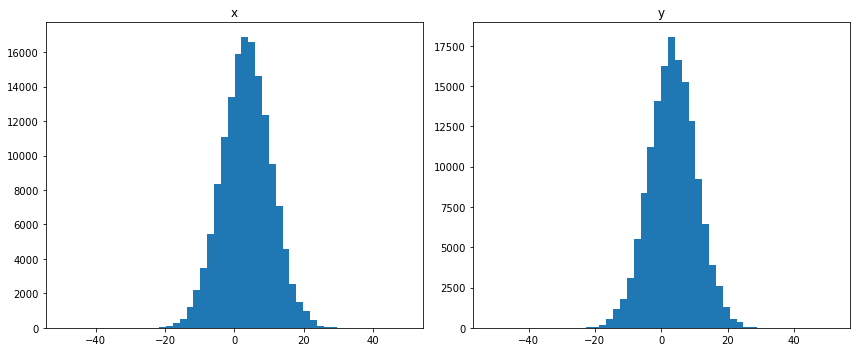

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(samples[:, 0], weights=weights, bins=50)
plt.title("x")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], weights=weights, bins=50)
plt.title("y")
plt.tight_layout()
plt.savefig("figs/p5_IS_hist.png")

## MH Gibbs

In [7]:
num_samples = int(5e5)
gibbs = MH_Gibbs(load_graph(5))

start = time.time()
samples, log_density = gibbs.sample(num_samples=num_samples)
end = time.time()

samples = np.array([sample.numpy() for sample in samples])
log_density = np.array(log_density)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean and variance of x: {:.3f} and {:.3f}".format(np.mean(samples[:, 0]), np.var(samples[:, 0])))
print("Posterior mean and variance of y: {:.3f} and {:.3f}".format(np.mean(samples[:, 1]), np.var(samples[:, 1])))

Number of samples: 500000
Sampling time: 326 seconds
Posterior mean and variance of x: 4.111 and 0.564
Posterior mean and variance of y: 2.889 and 0.563


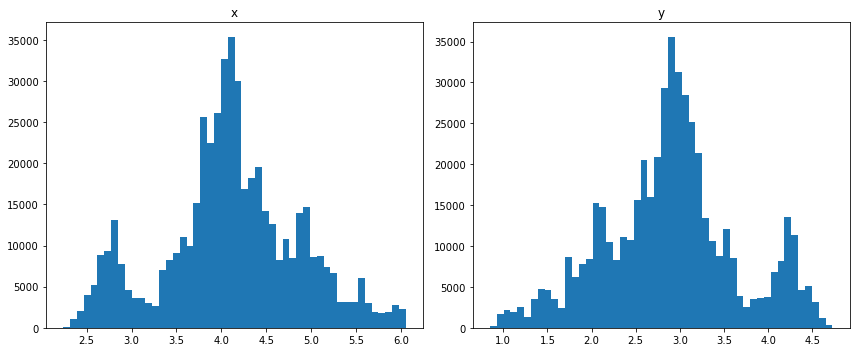

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(samples[:, 0], bins=50)
plt.title("x")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], bins=50)
plt.title("y")
plt.tight_layout()
plt.savefig("figs/p5_gibbs_hist.png")

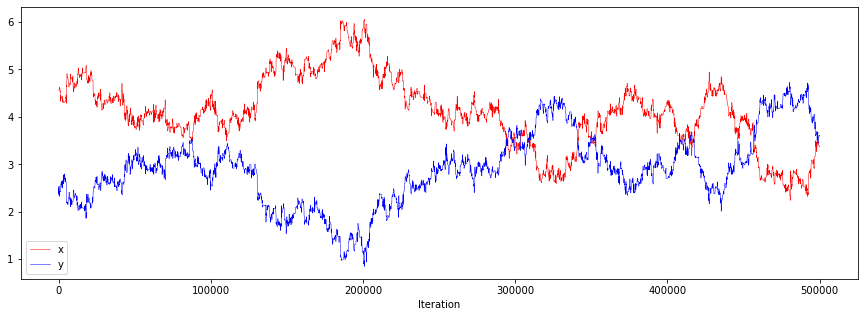

In [9]:
plt.figure(figsize=(15,5))
plt.plot(samples[:, 0], linewidth=0.5, color="red", label="x")
plt.plot(samples[:, 1], linewidth=0.5, color="blue", label="y")
plt.legend(loc="lower left")
plt.xlabel("Iteration")
plt.savefig("figs/p5_gibbs_trace.png")

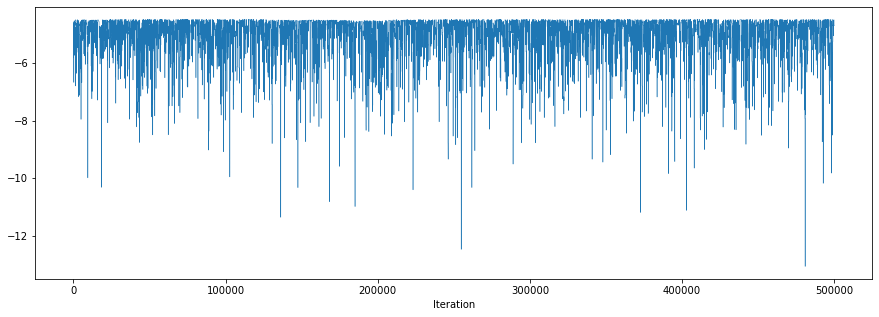

In [10]:
plt.figure(figsize=(15,5))
plt.plot(log_density, linewidth=0.5)
plt.xlabel("Iteration")
plt.savefig("figs/p5_gibbs_density.png")

## HMC

In [7]:
num_samples = int(1e5)
hmc = HMC(load_graph(5))
T = 10
epsilon = 0.01
M = torch.eye(len(hmc.X))

start = time.time()
samples, log_density = hmc.sample(num_samples, T, epsilon, M)
end = time.time()

samples = np.array([sample.numpy() for sample in samples])
log_density = np.array(log_density)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean and variance of x: {:.3f} and {:.3f}".format(np.mean(samples[:, 0]), np.var(samples[:, 0])))
print("Posterior mean and variance of y: {:.3f} and {:.3f}".format(np.mean(samples[:, 1]), np.var(samples[:, 1])))

Number of samples: 100000
Sampling time: 337 seconds
Posterior mean and variance of x: 3.564 and 29.716
Posterior mean and variance of y: 3.436 and 29.717


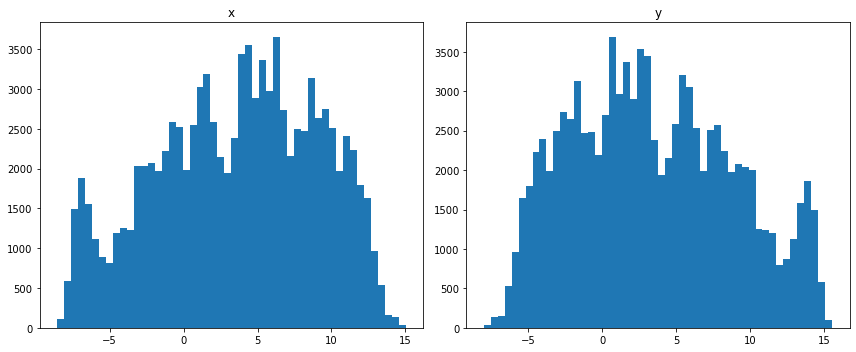

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(samples[:, 0], bins=50)
plt.title("x")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], bins=50)
plt.title("y")
plt.tight_layout()
plt.savefig("figs/p5_hmc_hist.png")

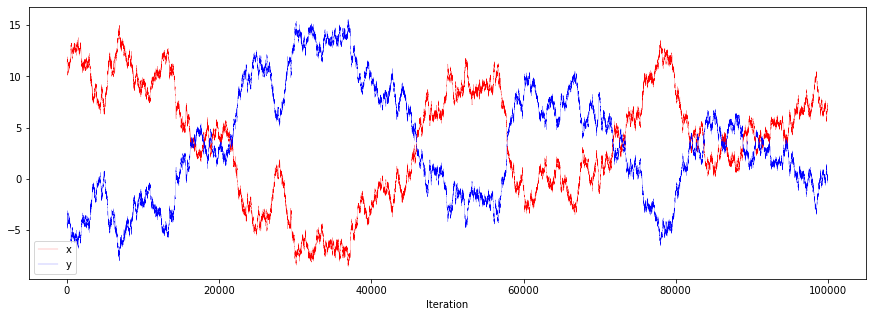

In [11]:
plt.figure(figsize=(15,5))
plt.plot(samples[:, 0], linewidth=0.2, color="red", label="x")
plt.plot(samples[:, 1], linewidth=0.2, color="blue", label="y")
plt.legend(loc="lower left")
plt.xlabel("Iteration")
plt.savefig("figs/p5_hmc_trace.png")

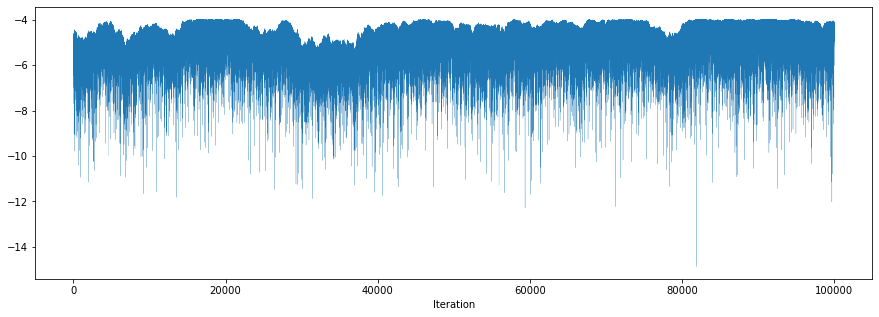

In [12]:
plt.figure(figsize=(15,5))
plt.plot(log_density, linewidth=0.2)
plt.xlabel("Iteration")
plt.savefig("figs/p5_hmc_density.png")